# 🧠 Deep Neural Network (DNN) — Step-by-Step Guide

---

## 1. What is a Neural Network?

A system that mimics the human brain to recognize patterns. It learns from examples to make predictions.

- Neurons: Perform simple calculations.
- Layers: Group of neurons.
- Network: Connects neurons across layers.

---

## 2. Why "Deep"?

- Shallow: 1 hidden layer.
- Deep: 2+ hidden layers.

More depth helps the model **learn more abstract features**.

Example (image):
- Layer 1: Detects edges
- Layer 2: Detects shapes
- Layer 3: Detects faces

---

## 3. Structure of a DNN

- **Input Layer**: Raw data (e.g., pixels, numbers)
- **Hidden Layers**: Transform data with math
- **Output Layer**: Prediction

Each layer computes:

$$
z^{[l]} = W^{[l]} a^{[l-1]} + b^{[l]} \\
a^{[l]} = \sigma(z^{[l]})
$$

Where:
- $ W^{[l]} $: weights
- $ b^{[l]} $: biases
- $ \sigma $: activation function (e.g., ReLU)

---

## 4. Forward Propagation

The data moves **forward** through the layers.

Each step:
1. Compute $ z = W \cdot a + b $
2. Apply activation $ a = \sigma(z) $

---

## 5. Loss Function

Measures how wrong the prediction is.

Examples:
- **MSE** (for regression)
- **Cross-Entropy** (for classification)

Loss guides learning.

---

## 6. Backpropagation

Uses the **chain rule** from calculus to calculate gradients:

- Gradients tell us how to change weights to minimize loss.
- Works backward: Output → Input

---

## 7. Optimization

Updates weights using gradients:

$$
W \leftarrow W - \eta \cdot \frac{\partial L}{\partial W}
$$

Where:
- $ \eta $: learning rate
- $ \frac{\partial L}{\partial W} $: gradient

Optimizers: SGD, Adam, RMSProp

---

## 8. Training Loop

1. Forward pass
2. Compute loss
3. Backward pass (backpropagation)
4. Update weights

Repeat for many epochs (iterations).

---

## 9. Final Model

After training:
- Model generalizes to new inputs.
- Makes accurate predictions.

---

## 🧪 Example: DNN on XOR Dataset (Python)


In [1]:
import numpy as np

# Activation functions and derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# XOR Dataset
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([[0],
              [1],
              [1],
              [0]])

# Seed for reproducibility
np.random.seed(42)

# Network architecture
input_size = 2
hidden_size = 4
output_size = 1
learning_rate = 0.1

# Initialize weights and biases
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))

W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# Training loop
for epoch in range(10000):
    # Forward pass
    z1 = X @ W1 + b1
    a1 = sigmoid(z1)

    z2 = a1 @ W2 + b2
    a2 = sigmoid(z2)

    # Compute loss (Mean Squared Error)
    loss = np.mean((y - a2)**2)

    # Backpropagation
    d_loss_output = (a2 - y) * sigmoid_derivative(a2)
    d_loss_hidden = d_loss_output @ W2.T * sigmoid_derivative(a1)

    # Gradient Descent Update
    W2 -= learning_rate * (a1.T @ d_loss_output)
    b2 -= learning_rate * np.sum(d_loss_output, axis=0, keepdims=True)

    W1 -= learning_rate * (X.T @ d_loss_hidden)
    b1 -= learning_rate * np.sum(d_loss_hidden, axis=0, keepdims=True)

    # Print loss every 1000 epochs
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Final prediction
print("\nFinal Predictions:")
print(np.round(a2))


Epoch 0, Loss: 0.2832
Epoch 1000, Loss: 0.2452
Epoch 2000, Loss: 0.2124
Epoch 3000, Loss: 0.1503
Epoch 4000, Loss: 0.0572
Epoch 5000, Loss: 0.0209
Epoch 6000, Loss: 0.0107
Epoch 7000, Loss: 0.0067
Epoch 8000, Loss: 0.0047
Epoch 9000, Loss: 0.0035

Final Predictions:
[[0.]
 [1.]
 [1.]
 [0.]]


# DNN Graph

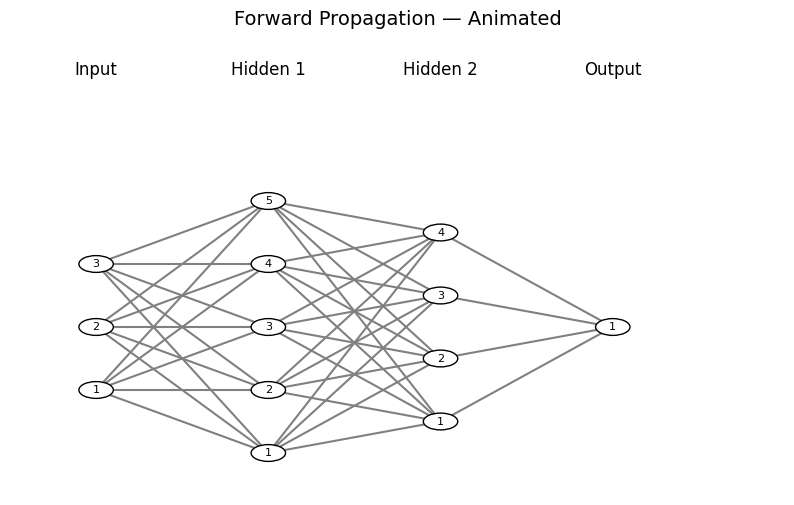

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.animation import FuncAnimation
import numpy as np

# Define the structure
layer_sizes = [3, 5, 4, 1]
layer_labels = ['Input', 'Hidden 1', 'Hidden 2', 'Output']
neuron_radius = 0.2
positions = []

# Layout Calculation
def calculate_positions(layer_sizes):
    pos = []
    n_layers = len(layer_sizes)
    h_spacing = 2
    v_spacing = 1.5
    for i, layer_size in enumerate(layer_sizes):
        x = i * h_spacing
        y_offset = (max(layer_sizes) - layer_size) / 2
        for j in range(layer_size):
            y = (j + y_offset) * v_spacing
            pos.append((x, y, i, j))  # x, y, layer, neuron
    return pos

positions = calculate_positions(layer_sizes)

# Plot Setup
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(-1, len(layer_sizes)*2)
ax.set_ylim(-1, max(layer_sizes)*2)
ax.axis('off')

# Store artists
circles = []
texts = []
lines = []

# Draw the network
def draw_network():
    for (x, y, layer, neuron) in positions:
        circle = plt.Circle((x, y), neuron_radius, color='white', ec='black', zorder=2)
        ax.add_patch(circle)
        label = ax.text(x, y, f'{neuron+1}', ha='center', va='center', fontsize=8)
        circles.append(circle)
        texts.append(label)

    # Draw connections
    for i in range(len(layer_sizes) - 1):
        layer_a = [(x, y) for (x, y, l, _) in positions if l == i]
        layer_b = [(x, y) for (x, y, l, _) in positions if l == i + 1]
        for (x1, y1) in layer_a:
            for (x2, y2) in layer_b:
                line = plt.Line2D([x1, x2], [y1, y2], color='gray', zorder=1)
                ax.add_line(line)
                lines.append(line)

    # Draw layer labels
    for i, label in enumerate(layer_labels):
        x = i * 2
        ax.text(x, max(layer_sizes)*2 - 1, label, ha='center', fontsize=12)

draw_network()

# Animation function
def animate(frame):
    # Reset all neuron colors
    for c in circles:
        c.set_facecolor('white')

    # Highlight current layer
    for i, (x, y, layer, _) in enumerate(positions):
        if layer == frame:
            circles[i].set_facecolor('lightgreen')

ani = FuncAnimation(fig, animate, frames=len(layer_sizes),
                    interval=1000, repeat=True)

plt.title("Forward Propagation — Animated", fontsize=14)
plt.show()



# 🧠 DNN Example — With Mathematical Breakdown

We simulate a DNN over **3 training iterations (epochs)** and include the exact mathematical operations used.

---

## 📐 Architecture

- **Input Layer:** 2 neurons  
- **Hidden Layer:** 2 neurons  
- **Output Layer:** 1 neuron  
- **Activation Function:** Sigmoid  
- **Loss Function:** Binary Cross-Entropy  
- **Learning Rate:** 0.1  

---

## 🧮 Initial Setup

Given input vector:
```
x = [1.0, 0.5]
y = 1
```

Initial weights and biases:

```
W1 = [[0.1, 0.4],
      [0.2, 0.3]]
b1 = [0.1, 0.1]

W2 = [0.7, 0.5]
b2 = 0.2
```

The sigmoid activation function:
$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

The binary cross-entropy loss function:
$$
\mathcal{L}(\hat{y}, y) = -[y \log(\hat{y}) + (1 - y) \log(1 - \hat{y})]
$$

---

# 🔁 Iteration 1

## 🔹 Forward Propagation

**Step 1: Hidden layer pre-activation:**
$$
z^{[1]} = W^{[1]} x + b^{[1]} = [0.3, 0.65]
$$

**Step 2: Hidden layer activation:**
$$
a^{[1]} = \sigma(z^{[1]}) \approx [0.5744, 0.6570]
$$

**Step 3: Output pre-activation:**
$$
z^{[2]} = W^{[2]} a^{[1]} + b^{[2]} = 0.9303
$$

**Step 4: Output prediction:**
$$
a^{[2]} = \hat{y} = \sigma(z^{[2]}) \approx 0.7171
$$

## 🔹 Loss

$$
\mathcal{L} = -\log(0.7171) \approx 0.332
$$

## 🔹 Backpropagation

**Step 1: Output error:**
$$
\delta^{[2]} = \hat{y} - y = -0.2829
$$

**Step 2: Gradient of loss w.r.t output weights:**
$$
\frac{\partial \mathcal{L}}{\partial W^{[2]}} = \delta^{[2]} \cdot a^{[1]} \approx [-0.0329, -0.0376]
$$

**Step 3: Backpropagate error to hidden layer:**
$$
\delta^{[1]} = (W^{[2]})^T \delta^{[2]} \circ \sigma'(z^{[1]}) \approx [-0.0099, -0.0099]
$$

**Step 4: Gradient for W1 and b1:**
```
dW1 = [[-0.0099, -0.0099],
       [-0.0050, -0.0050]]
db1 = [-0.0099, -0.0099]
```

## 🔹 Parameter Updates

```
W2 = [0.7329, 0.5376]
b2 = 0.2572

W1 = [[0.1099, 0.4099],
      [0.2050, 0.3050]]
b1 = [0.1099, 0.1099]
```

---

# 🔁 Iteration 2

## 🔹 Forward Propagation

**Step 1:**
$$
z^{[1]} = W^{[1]} x + b^{[1]} = [0.3274, 0.6723]
$$

**Step 2:**
$$
a^{[1]} = \sigma(z^{[1]}) \approx [0.5811, 0.6620]
$$

**Step 3:**
$$
z^{[2]} = W^{[2]} a^{[1]} + b^{[2]} = 1.0664
$$

**Step 4:**
$$
\hat{y} = \sigma(z^{[2]}) \approx 0.7439
$$

## 🔹 Loss

$$
\mathcal{L} = -\log(0.7439) \approx 0.2958
$$

## 🔹 Backpropagation

```
δ_output = -0.2561
dz2 ≈ -0.0487

dW2 = [-0.0283, -0.0322]
db2 = -0.0487

dz1 ≈ [-0.0087, -0.0085]
dW1 = [[-0.0087, -0.0085],
       [-0.0043, -0.0042]]
db1 = [-0.0087, -0.0085]
```

## 🔹 Parameter Updates

```
W2 = [0.7612, 0.5698]
b2 = 0.3059

W1 = [[0.1186, 0.4184],
      [0.2093, 0.3092]]
b1 = [0.1186, 0.1184]
```

---

# 🔁 Iteration 3

## 🔹 Forward Propagation

```
z1 = x @ W1 + b1 = [0.3458, 0.6904]
a1 = sigmoid(z1) ≈ [0.5854, 0.6661]

z2 = a1 @ W2 + b2 = 1.1962
a2 = sigmoid(z2) ≈ 0.7678
```

## 🔹 Loss

```
L = -log(0.7678) ≈ 0.2645
```

---

# 📊 Final Summary Table

| Iteration | Prediction (ŷ) | Loss   | W2 (approx)         |
|-----------|----------------|--------|----------------------|
| 1         | 0.7171         | 0.3320 | [0.7329, 0.5376]     |
| 2         | 0.7439         | 0.2958 | [0.7612, 0.5698]     |
| 3         | 0.7678         | 0.2645 | [~0.789, ~0.6] est.  |

---

✅ This shows how forward propagation, gradient descent, and backpropagation evolve across iterations using core DNN mathematics.
